In [52]:
import pandas as pd
import csv
from scipy.stats import norm
import statistics
%matplotlib inline
import sklearn
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

In [53]:
data = pd.read_csv('auctions.csv')
data

,auction_id,RoR,STR,BPL,lots,product_types,avg_start_bid,avg_reserve,auction_mech,state
0,100,1.026112,0.503097,8.324074,108,0.768519,0.000000,10568.250000,SealedBid,MD
1,101,1.407666,1.000000,5.571429,7,1.000000,0.000000,4805.617249,EnglishForward,TX
2,102,0.000000,0.000000,0.000000,2,1.000000,0.000000,3550.000000,SealedBid,MD
3,103,0.884021,1.000000,1.000000,3,0.333333,0.000000,7693.876790,FixedPrice,NE
4,104,0.972593,1.000000,4.533333,90,0.611111,0.000000,8661.111111,EnglishForward,NY
...,...,...,...,...,...,...,...,...,...,...
6215,6315,1.010807,0.280132,1.571429,115,0.796610,0.998503,15009.730254,EnglishForward,FL
6216,6316,0.997599,1.000000,1.000000,10,1.000000,0.000000,15296.658008,FixedPrice,FL
6217,6317,0.942716,0.333875,6.200000,45,0.844444,0.000000,12188.244667,EnglishForward,DE
6218,6318,1.000787,0.509448,6.758065,62,0.338710,0.000000,14172.611210,EnglishForward,NV


In [54]:
data.rename(columns = {'RoR': 'return_on_reserve',
                      'STR': 'lots_sold',
                      'BPL': 'bidders_per_lot'}, inplace = True)
data.head()

,auction_id,return_on_reserve,lots_sold,bidders_per_lot,lots,product_types,avg_start_bid,avg_reserve,auction_mech,state
0,100,1.026112,0.503097,8.324074,108,0.768519,0.0,10568.250000,SealedBid,MD
1,101,1.407666,1.000000,5.571429,7,1.000000,0.0,4805.617249,EnglishForward,TX
2,102,0.000000,0.000000,0.000000,2,1.000000,0.0,3550.000000,SealedBid,MD
3,103,0.884021,1.000000,1.000000,3,0.333333,0.0,7693.876790,FixedPrice,NE
4,104,0.972593,1.000000,4.533333,90,0.611111,0.0,8661.111111,EnglishForward,NY


In [55]:
data = np.round(data,decimals=2)
data

,auction_id,return_on_reserve,lots_sold,bidders_per_lot,lots,product_types,avg_start_bid,avg_reserve,auction_mech,state
0,100,1.03,0.50,8.32,108,0.77,0.0,10568.25,SealedBid,MD
1,101,1.41,1.00,5.57,7,1.00,0.0,4805.62,EnglishForward,TX
2,102,0.00,0.00,0.00,2,1.00,0.0,3550.00,SealedBid,MD
3,103,0.88,1.00,1.00,3,0.33,0.0,7693.88,FixedPrice,NE
4,104,0.97,1.00,4.53,90,0.61,0.0,8661.11,EnglishForward,NY
...,...,...,...,...,...,...,...,...,...,...
6215,6315,1.01,0.28,1.57,115,0.80,1.0,15009.73,EnglishForward,FL
6216,6316,1.00,1.00,1.00,10,1.00,0.0,15296.66,FixedPrice,FL
6217,6317,0.94,0.33,6.20,45,0.84,0.0,12188.24,EnglishForward,DE
6218,6318,1.00,0.51,6.76,62,0.34,0.0,14172.61,EnglishForward,NV


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6220 entries, 0 to 6219
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   auction_id         6220 non-null   int64  
 1   return_on_reserve  6220 non-null   float64
 2   lots_sold          6220 non-null   float64
 3   bidders_per_lot    6220 non-null   float64
 4   lots               6220 non-null   int64  
 5   product_types      6220 non-null   float64
 6   avg_start_bid      6220 non-null   float64
 7   avg_reserve        6220 non-null   float64
 8   auction_mech       6220 non-null   object 
 9   state              6220 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 486.1+ KB


In [57]:
data.describe()

,auction_id,return_on_reserve,lots_sold,bidders_per_lot,lots,product_types,avg_start_bid,avg_reserve
count,6220.000000,6220.000000,6220.000000,6220.000000,6220.000000,6220.000000,6220.000000,6.220000e+03
mean,3209.500000,0.914957,0.611757,3.753723,38.519775,0.777415,0.147196,1.407759e+04
std,1795.703669,0.447061,0.348636,2.898882,37.934576,0.207085,0.343180,1.631786e+05
min,100.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000e+02
25%,1654.750000,0.900000,0.310000,1.000000,9.000000,0.690000,0.000000,7.382247e+03
50%,3209.500000,1.000000,0.650000,3.210000,27.000000,0.810000,0.000000,1.005908e+04
75%,4764.250000,1.020000,1.000000,5.770000,55.000000,0.930000,0.000000,1.376381e+04
max,6319.000000,24.480000,1.000000,20.000000,516.000000,1.000000,1.000000,1.280807e+07


In [58]:
# let's get some more information from the Dataframe 
number_of_lots = data['lots'].sum()   # total number of lots in all the auctions
print(number_of_lots)

239593


In [59]:
# Which is the most popular type of auction?
data['auction_mech'].value_counts()

EnglishForward    3228
FixedPrice        1568
SealedBid         1424
Name: auction_mech, dtype: int64

In [60]:
# Which state has more auctions?
print(data['state'].value_counts())
print(data['state'].nunique())

CA    1292
FL     783
GA     650
TX     481
SC     405
NV     375
MD     326
WA     313
IN     290
DE     288
NY     153
MA     108
NJ      97
AZ      92
PA      90
CO      89
MO      77
NC      54
IA      53
OR      46
AR      44
ID      40
NE      33
MI      31
VT      10
Name: state, dtype: int64
25


In [61]:
# What is the average number of lots sold for type of auction?
type_sold = data.groupby('auction_mech')['lots_sold'].mean()
type_sold

auction_mech
EnglishForward    0.672038
FixedPrice        0.497347
SealedBid         0.601088
Name: lots_sold, dtype: float64

In [62]:
# What is the average number of lots sold for type of auction?
data.groupby('auction_mech').mean()

,auction_id,return_on_reserve,lots_sold,bidders_per_lot,lots,product_types,avg_start_bid,avg_reserve
auction_mech,,,,,,,,
EnglishForward,3195.436803,0.960963,0.672038,4.652989,45.679368,0.766834,0.283631,16550.860022
FixedPrice,3189.374362,0.879241,0.497347,0.898393,19.327806,0.823648,0.000000,11113.536964
SealedBid,3263.540028,0.849993,0.601088,4.859291,43.422753,0.750492,0.000000,11734.855169


In [63]:
#finding the three most important features with the target variable lots_sold through pearson correlation

correlations = data.corr(method='pearson')['lots_sold'][:-1].sort_values(ascending=False)

print('Top 5 most positively correlated features:\n{}\n'.format(correlations[:5]))
print('Top 3 most negatively correlated features:\n{}\n'.format(correlations[:-4:-1]))

Top 5 most positively correlated features:
lots_sold            1.000000
bidders_per_lot      0.353722
return_on_reserve    0.324387
product_types        0.022932
auction_id           0.004129
Name: lots_sold, dtype: float64

Top 3 most negatively correlated features:
avg_start_bid   -0.299525
lots            -0.147598
auction_id       0.004129
Name: lots_sold, dtype: float64



In [77]:
data.corr()

,auction_id,return_on_reserve,lots_sold,bidders_per_lot,lots,product_types,avg_start_bid,avg_reserve
auction_id,1.000000,-0.037543,0.004129,0.006306,-0.020555,0.026288,-0.044984,0.003715
return_on_reserve,-0.037543,1.000000,0.324387,0.257786,0.140606,-0.048726,0.071658,-0.003666
lots_sold,0.004129,0.324387,1.000000,0.353722,-0.147598,0.022932,-0.299525,-0.024819
bidders_per_lot,0.006306,0.257786,0.353722,1.000000,0.241507,-0.068465,-0.204465,-0.015015
lots,-0.020555,0.140606,-0.147598,0.241507,1.000000,-0.350416,0.377427,0.016265
product_types,0.026288,-0.048726,0.022932,-0.068465,-0.350416,1.000000,-0.015723,0.012568
avg_start_bid,-0.044984,0.071658,-0.299525,-0.204465,0.377427,-0.015723,1.000000,0.042403
avg_reserve,0.003715,-0.003666,-0.024819,-0.015015,0.016265,0.012568,0.042403,1.000000


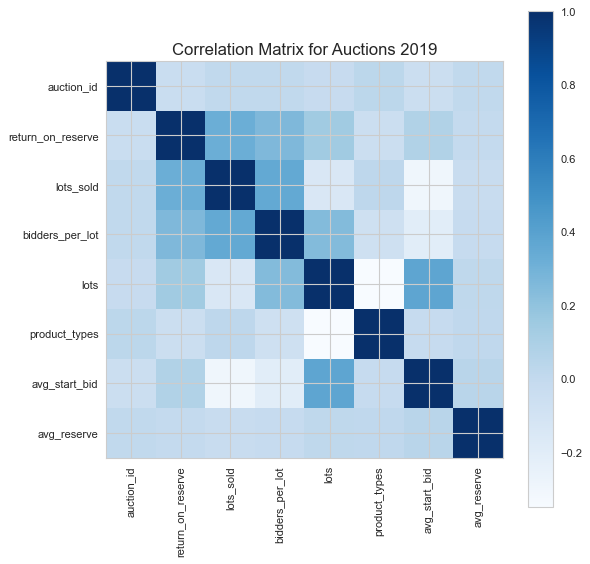

In [97]:
corr = data.corr()
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='r')
corrMat = plt.matshow(corr, fignum = 1, cmap=plt.get_cmap('Blues'))
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title('Correlation Matrix for Auctions 2019', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Number of auctions per State')

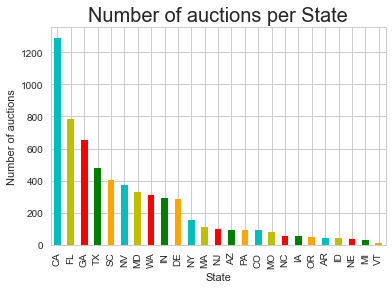

In [65]:
#histogram with the number of auctions per city
fig_3 = data['state'].value_counts().plot(kind = 'bar', color = ['c','y','r', 'g', 'orange']);
plt.xlabel('State')
plt.ylabel('Number of auctions')
plt.title('Number of auctions per State', fontsize = 20)

Text(0.5, 1.0, 'State and percentage of lots sold')

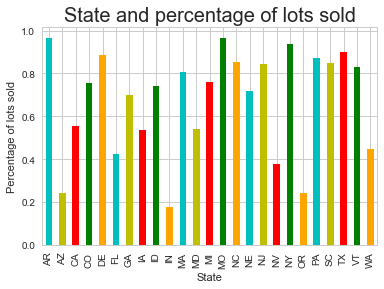

In [79]:
fig_4 = data.groupby('state')['lots_sold'].mean().plot(kind = 'bar', color = ['c','y','r', 'g', 'orange']);

plt.xlabel('State')
plt.ylabel('Percentage of lots sold')
plt.title('State and percentage of lots sold', fontsize = 20)

Text(0.5, 1.0, 'Type and number of auctions')

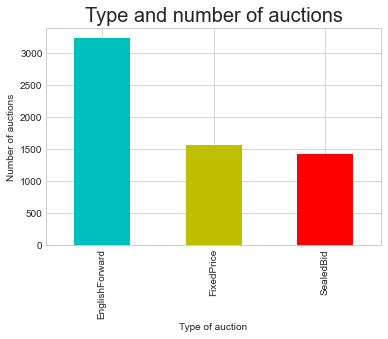

In [13]:
#plot the number of auctions per type of auction with a histogram
fig_1 = data['auction_mech'].value_counts().plot(kind = 'bar', color = ['c','y','r']);

plt.xlabel('Type of auction')
plt.ylabel('Number of auctions')
plt.title('Type and number of auctions', fontsize = 20)

Text(0.5, 1.0, 'Auction type and percentage of lots sold')

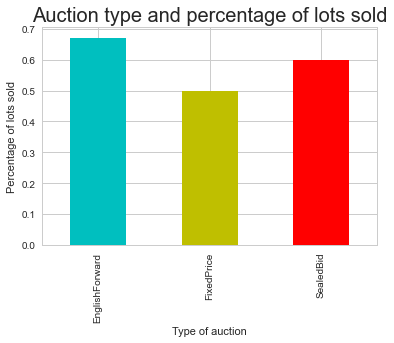

In [64]:
fig_2 = data.groupby('auction_mech')['lots_sold'].mean().plot(kind = 'bar', color = ['c','y','r']);

plt.xlabel('Type of auction')
plt.ylabel('Percentage of lots sold')
plt.title('Auction type and percentage of lots sold', fontsize = 20)

In [93]:
s_corr = data.auction_mech.str.get_dummies().corrwith(data.lots_sold)
s_corr

EnglishForward    0.179610
FixedPrice       -0.190538
SealedBid        -0.016676
dtype: float64

In [94]:
s_corr = data.auction_mech.str.get_dummies().corrwith(data.return_on_reserve)
s_corr

EnglishForward    0.106900
FixedPrice       -0.046385
SealedBid        -0.079187
dtype: float64

In [95]:
s_corr = data.auction_mech.str.get_dummies().corrwith(data.bidders_per_lot)
s_corr

EnglishForward    0.322239
FixedPrice       -0.571892
SealedBid         0.207828
dtype: float64

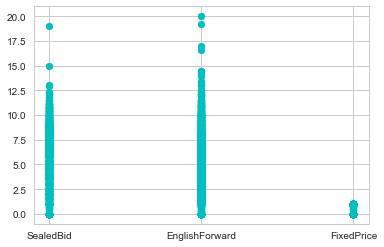

In [109]:
x = data['auction_mech']
y = data['bidders_per_lot']

plt.scatter(x, y, color = 'c')

{'whiskers': [<matplotlib.lines.Line2D at 0x1119621a280>,
 'caps': [<matplotlib.lines.Line2D at 0x111961e9190>,
 'boxes': [<matplotlib.lines.Line2D at 0x111961bc880>],
 'medians': [<matplotlib.lines.Line2D at 0x11196267130>],
 'fliers': [<matplotlib.lines.Line2D at 0x111962674f0>],
 'means': []}

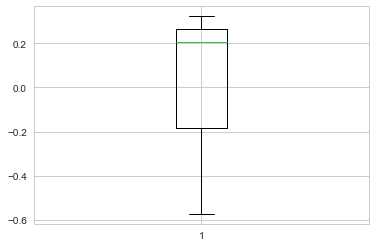

In [108]:
plt.boxplot(data.auction_mech.str.get_dummies().corrwith(data.bidders_per_lot))

In [115]:
data

,auction_id,return_on_reserve,lots_sold,bidders_per_lot,lots,product_types,avg_start_bid,avg_reserve,auction_mech,state
0,100,1.03,0.50,8.32,108,0.77,0.0,10568.25,SealedBid,MD
1,101,1.41,1.00,5.57,7,1.00,0.0,4805.62,EnglishForward,TX
2,102,0.00,0.00,0.00,2,1.00,0.0,3550.00,SealedBid,MD
3,103,0.88,1.00,1.00,3,0.33,0.0,7693.88,FixedPrice,NE
4,104,0.97,1.00,4.53,90,0.61,0.0,8661.11,EnglishForward,NY
...,...,...,...,...,...,...,...,...,...,...
6215,6315,1.01,0.28,1.57,115,0.80,1.0,15009.73,EnglishForward,FL
6216,6316,1.00,1.00,1.00,10,1.00,0.0,15296.66,FixedPrice,FL
6217,6317,0.94,0.33,6.20,45,0.84,0.0,12188.24,EnglishForward,DE
6218,6318,1.00,0.51,6.76,62,0.34,0.0,14172.61,EnglishForward,NV


In [113]:
total_sell = (data.avg_reserve+(data.avg_reserve * data.return_on_reserve))*(data.lots * data.lots_sold)

In [114]:
total_sell_per_auction

0       1.158492e+06
1       8.107081e+04
2       0.000000e+00
3       4.339348e+04
4       1.535615e+06
            ...     
6215    9.714597e+05
6216    3.059332e+05
6217    3.511310e+05
6218    8.962759e+05
6219    1.987661e+05
Length: 6220, dtype: float64

In [116]:
total_sell.sum()

2832356880.271924